# Disciplina de Aprendizado de Máquina não supervisionado

## Aula 04

### Algoritmos Hierárquicos

Algoritimos de **clustering hierárquico** são aqueles que geram uma árvore de clusters (`dendrograma`), tendo como base técnicas de separação ou agregação. Uma árvore de clusters é uma árvore que ilustra uma sequência de clusterizações onde cada clusterização é uma partição do conjunto de dados. 

Algoritmos **aglomerativos** são aqueles que funcionam de maneira *bottom-up*, i.e., agregando elementos (dois a dois) até que um único e grande *cluster* seja formado. Esses são os mais comuns e os mais usados.

Há também os **divisivos**, que são aqueles que iniciam com um grande *cluster* e o dividem de maneira sucessiva, até que ao final tenhamos um *cluster* para cada elemento (*top-down*).

Para cada família, há uma série algoritmos diferentes. Vamos estudar os principais. 

Em termos gerais, as vantagens mais incipientes desses algoritmos é que eles não são sensíveis à inicialização de parâmetros e possuem certa robustez para presença de ruídos. No entanto, são computacionalmente mais "custosos" do que os não hierárquicos (não sendo, portanto, adequados para Big Data). Além disso, são estáticos no sentido de que, em uma execução, uma vez que um cluster tenha sido formado, ele não muda mais. Finalmente, possuem dificuldade em separar *clusters* que possuam alguma interseção.

---

**Vamos iniciar criando um conjunto de dados:**


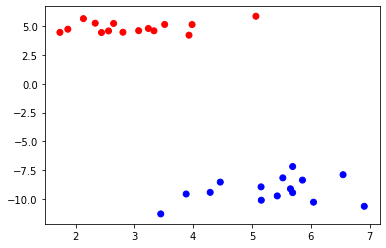

In [132]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#elementos, classes = make_blobs(n_samples=100, centers=2, random_state=10)
elementos, classes = make_blobs(n_samples=30, centers=2, random_state=10)
plt.scatter(elementos[:,0], y=elementos[:,1], c=classes, cmap=plt.get_cmap('bwr'))
plt.show()

---
Para gerar o agrupamento, **necessitamos especificar** um **método de avaliação** ou cálculo **de similaridade** e um **método de análise de vizinhança**.

A **similaridade é normalmente mensurada em termos de distância (ou proximidade) euclidiana**. 

Já para a análise de **vizinhança**, existem **várias abordagens**. Seguem algumas (todas feitas par-a-par):

1. *Single linkage*: a ligação simples considera o vizinho mais próximo (*nearest neighbor*). Nela, a distância entre os *clusters* é correspondente à distância entre os seus elementos mais próximos. 
2. *Complete linkage*: também conhecida como *furthest neighbor* (vizinho mais distante*, sendo definida pela distância entre os elementos mais distantes em cada cluster. 
3. *Average linkage*: conhecida como UPGMA (*Unweighted Pair Group Method with Arithmetic mean*), e considera a média das distâncias entre todos os elementos dos clusters envolvidos.
4. *Weighted linkage*: também chamada de WPGMA (*Weighted Pair Group Method with Arithmetic mean*). Os pontos individuais dos *clusters* sendo analisados contribuem para a distância agregada entre um cluster menor e um cluster maior.
5. *Centroid linkage*: também conhecida por UPGMC (*Unweighted Pair Group Method using Centroids*). Usa os centroides dos *clusters* em questão como base para calcular sua distância.
6. Método de *Ward*: também chamado de MISSQ (*Minimal Increase of Sum-of-Squares*). Analisa a distância entre clusters com base no ESS ([*Explained Sum of Squares*](https://en.wikipedia.org/wiki/Explained_sum_of_squares), não confundir com o SSE já visto), que corresponde à soma dos quadrados dos desvios dos valores preditos a partir da média de uma variável de resposta. 

O método de [`Ward`](https://en.wikipedia.org/wiki/Ward%27s_method) é o mais comumente utilizado, pois ele procura minimizar os erros. A distância euclidiana funciona bem para quantidades pequenas de dimensões e que tenham mais ou menos a mesma escala (e para clusters isométricos).

---

A seguir **vamos utilizar o método de `Ward` e a distância euclidiana** para gerar um dendrograma no *dataset* anterior:

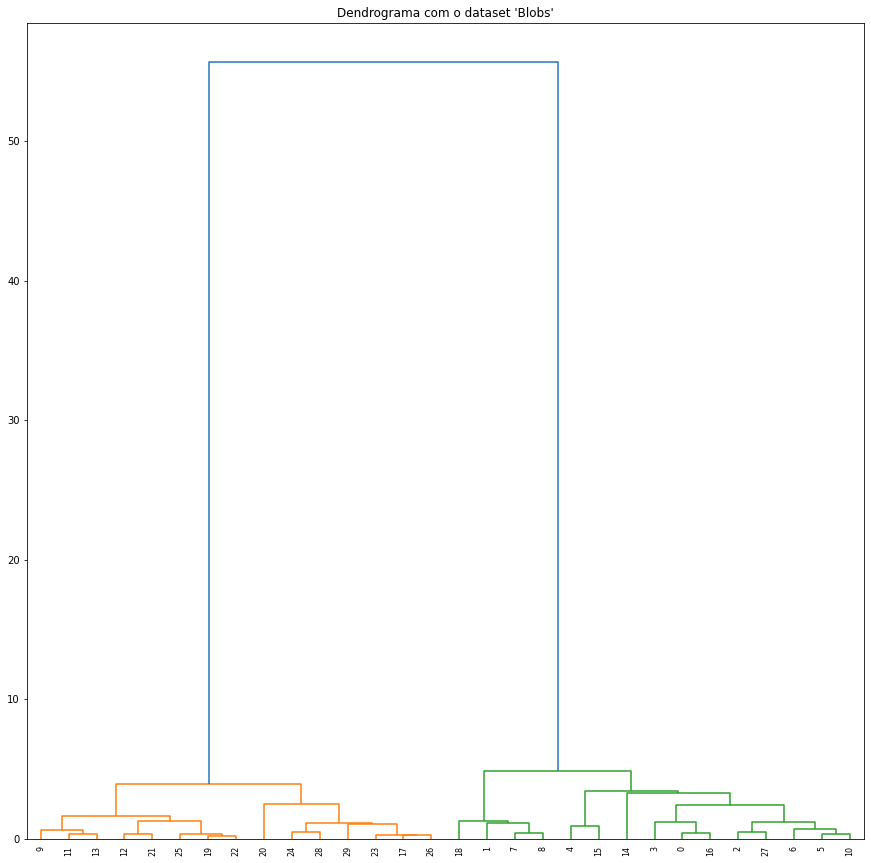

In [133]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_result = linkage(elementos, method='ward', metric='euclidean')

plt.figure(figsize=(15, 15))
plt.title("Dendrograma com o dataset 'Blobs'")

dendrogram(linkage_result, leaf_rotation=90., leaf_font_size=8.)

plt.show()

No **dendrograma**, na base podemos identificar quais são os elementos individuais (*clusters* iniciais) que foram agrupados e com quem. 

Ao subir no gráfico, percorrendo as linhas, verificamos as junções e agrupamentos que foram sendo criados a cada nível. No topo, temos um único *cluster*, que corresponde a todos os elementos.

Podemos usar a estrutura criada pelo dendrograma para navegar pelos conglomerados e seus elementos. Podemos pensar em uma taxonomia de relações entre os *clusters* formados.

Eventualmente podemos desejar **fazer algum corte, selecionando um número apropriado de *clusters***. Para tanto, uma heurística consiste em identificar  casos em que as distâncias (linhas verticais) são maiores do que nas junções anteriores...

Enfim, após localizar essa linha horizontal, contamos quantas linhas verticais cruzam por ela. 

No exemplo abaixo, que considera o dendrograma anterior, posicionamos (manualmente) uma linha horizontal na posição `y=10` e podemos verificar que ela corta duas linhas verticais. Portanto, o número `2` parece ser um bom indicativo para o número de clusters que possui a maior distância separando-os. 

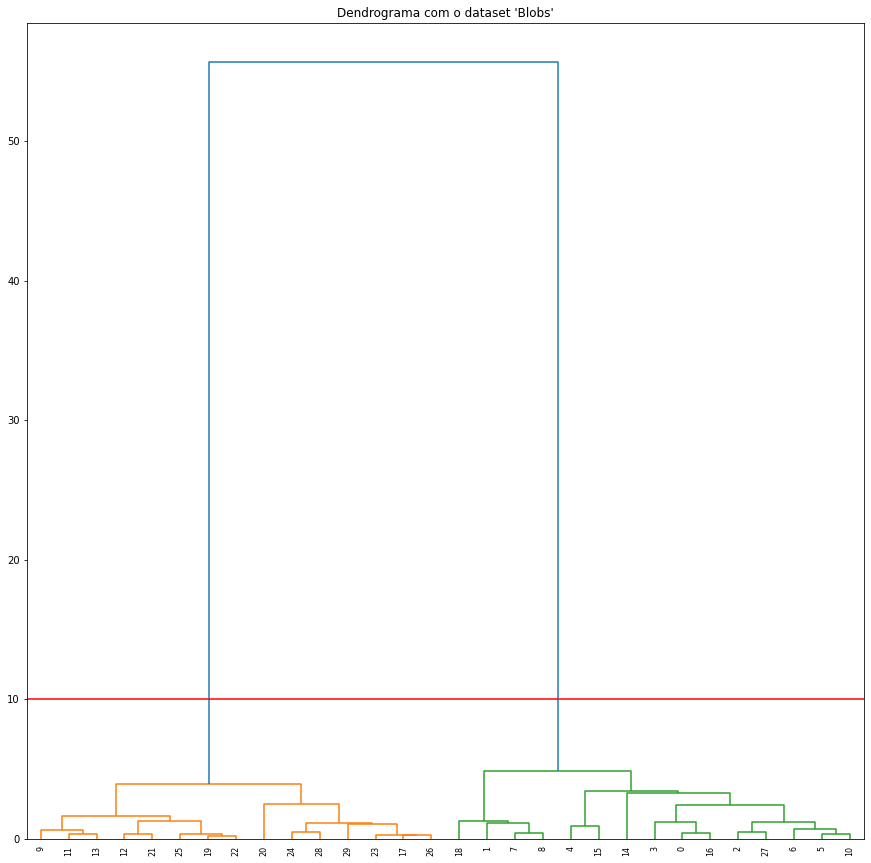

In [134]:
plt.figure(figsize=(15, 15))
dendrogram(linkage_result, leaf_rotation=90., leaf_font_size=8.)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title("Dendrograma com o dataset 'Blobs'")
plt.show()

Essa técnica serve (somente) de referência para a escolha do número de *clusters*. O resultado é altamente influenciado pela medida de distância escolhida e pelo método de ligação entre pares escolhido. Sempre gere dendrogramas com diferentes métodos de ligação e métricas, e concentre-se nos resultados apresentados nas linhas superiores, já que correspondem aos *clusters* com maior distância entre si. 

Uma vez que tenhamos definido a quantidade de *clusters*, **podemos pedir ao algoritmo que realize o processo de aglomeração**, mas **parando na quantidade de conglomerados que desejamos**. 

O trecho seguinte faz isso:

Text(0.5, 1.0, 'Resultado do clustering hierarquico')

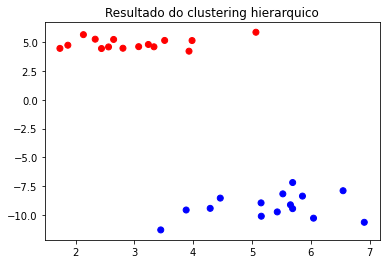

In [135]:
from sklearn.cluster import AgglomerativeClustering

# função que cria clusters usando a técnica de clusterização hierárquica aglomerativa
hierarchical_cluster_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster_model.fit_predict(elementos)

plt.scatter(elementos[:,0], y=elementos[:,1], label=labels, c=labels,cmap=plt.get_cmap('bwr'))
plt.title("Resultado do clustering hierarquico")

---
**Exercício 1**: utilizando o *dataset* seguinte (uma variação do que usamos na aula passada para duas classes de dados com formatos e distribuições diferentes), aplique o algoritmo de clusterização aglomerativa (hierarquica). 

Realize esse processo 4 vezes (em todas elas use a similaridade `euclidean`):
1. a primeira usando o mesmo método de ligação anterior (`ward`);
2. a segunda usando o método de ligação mais simples (i.e., `single`);
3. a terceira usando o método `average`;
4. e a quarta usando o método `complete`.

Para cada uma delas, gere um dendrograma e verifique se eles fazem sentido, se são iguais ou mudam alguma coisa. Ainda, seguindo a heurística que vimos anteriormente, procure identificar a quantidade de *clusters* mais apropriada para esse conjunto de dados (se houver divergência entre os dendrogramas, escolha a opção que lhe parecer mais apropriada, justificando sua escolha).  Elabore um texto explicando e justificando sua análise comparativa. 

Depois, como no exemplo anterior, tomando como base a quantidade de *clusters* escolhida por você, gere os clusters correspondentes para os 4 resultados, mostrando-os na tela em gráficos 2D. Analise se há diferenças entre eles e explique se eles fazem ou não sentido.

**Desafio 1**: avalie também o tempo de processamento da função `linkage` para cada um dos 4 casos. Verifique se há diferença significativa entre os métodos, em termos de tempo de execução.

**Desafio 2**: repita os casos 2-4, mas usando como similaridade a função `cosine` (o caso 1 não funcionará porque o método de `ward` só funciona com a função `euclidean`). 

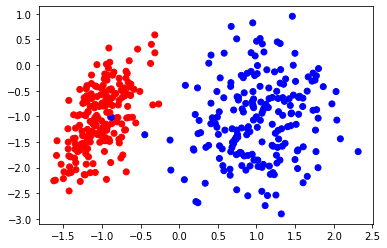

In [136]:
# geração do conjunto de dados a analisar comparativamente
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

elementos, classes = make_classification(n_samples=400, n_features=2, n_clusters_per_class=1, random_state=10, n_informative=2, n_redundant=0)
plt.scatter(elementos[:,0], y=elementos[:,1], c=classes, cmap=plt.get_cmap('bwr'))
plt.show()

In [137]:
from time import process_time
from scipy.cluster.hierarchy import dendrogram, linkage
import time


start = process_time()
linkage_result_1 = linkage(elementos, method='ward', metric='euclidean')
end = process_time()
print("Tempo de processamento com 'ward' e distância 'euclidean': ",  end-start)


start = process_time()
linkage_result_2 = linkage(elementos, method='single', metric='euclidean')
end = process_time()
print("Tempo de processamento com 'single' e distância 'euclidean': ",  end-start)

start = process_time()
linkage_result_3 = linkage(elementos, method='average', metric='euclidean')
end = process_time()
print("Tempo de processamento com 'average' e distância 'euclidean': ",  end-start)

start = process_time()
linkage_result_4 = linkage(elementos, method='complete', metric='euclidean')
end = process_time()
print("Tempo de processamento com 'complete' e distância 'euclidean': ",  end-start)

Tempo de processamento com 'ward' e distância 'euclidean':  0.006949374000015496
Tempo de processamento com 'single' e distância 'euclidean':  0.004744791999996778
Tempo de processamento com 'average' e distância 'euclidean':  0.0068464349999999286
Tempo de processamento com 'complete' e distância 'euclidean':  0.006276662000004762


**Exercício 1 (Desafio 1)**: O métodod de ligação anterior (ward), foi muito superior aos outros métodos. Entre os outros métodos não houve grande diferença ne tempo de processamento.

In [138]:
def printa_dendograma(linkage_result):
  plt.figure(figsize=(15, 15))
  dendrogram(linkage_result, leaf_rotation=90., leaf_font_size=8.)
  plt.axhline(y = 10, color = 'r', linestyle = '-')
  plt.title("Dendrograma com o dataset 'Blobs'")
  plt.show()

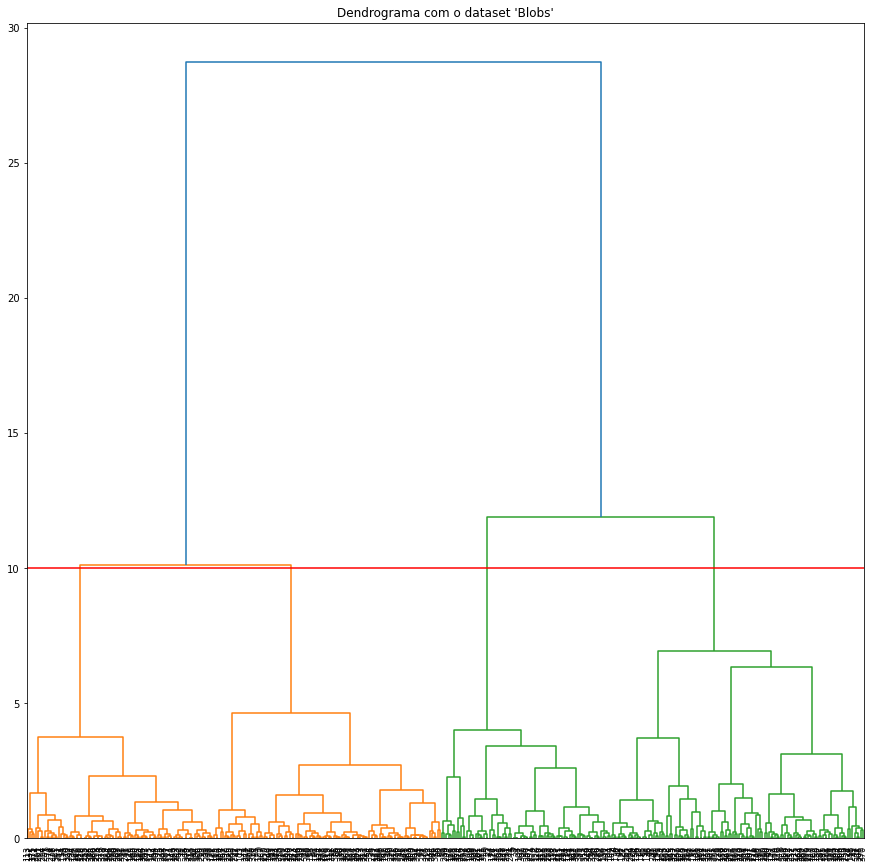

In [139]:
printa_dendograma(linkage_result_1)

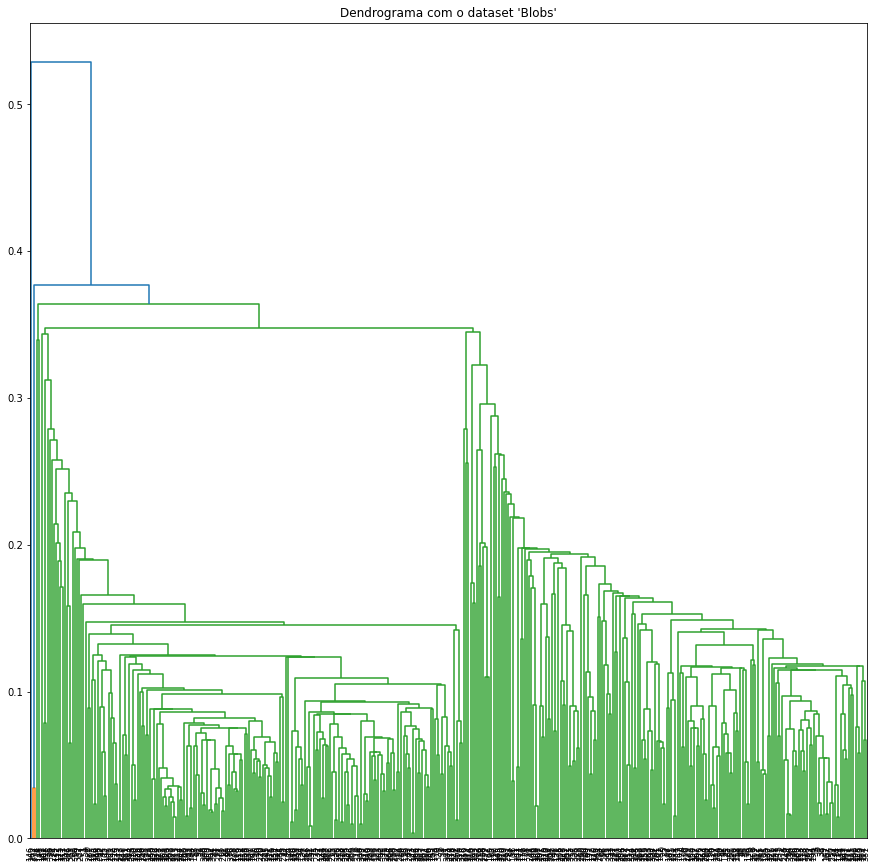

In [140]:
printa_dendograma(linkage_result_2)

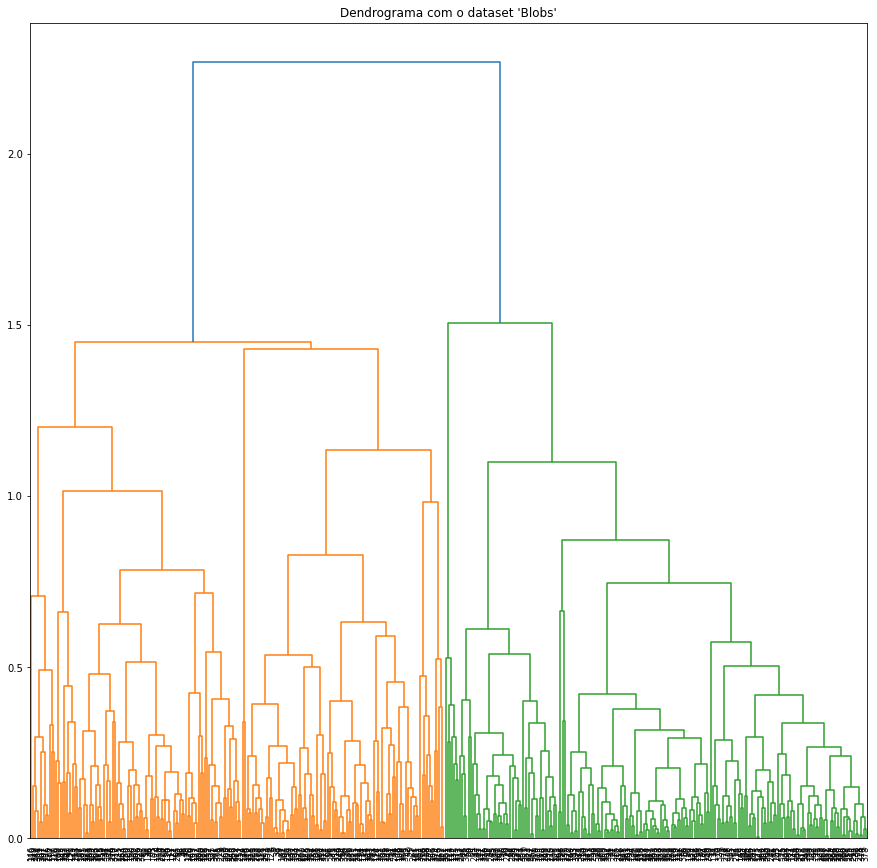

In [141]:
printa_dendograma(linkage_result_3)

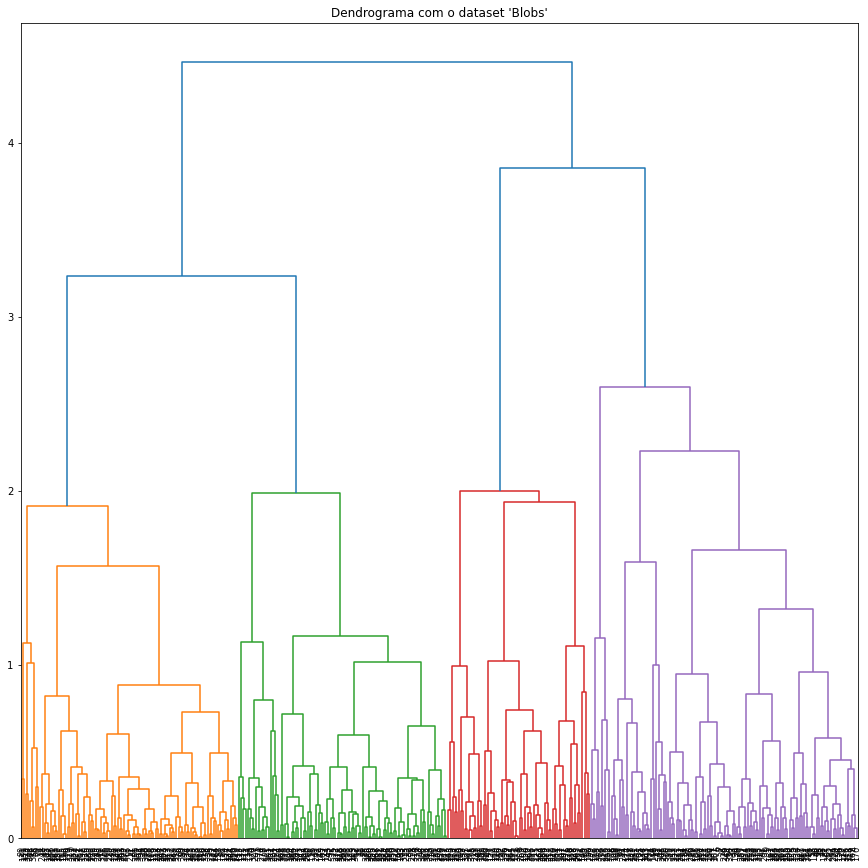

In [142]:
printa_dendograma(linkage_result_4)

**Exercício 1 (Desafio 2)**: 

Tempo de processamento com 'single' e distância 'cosine':  0.004856032999953186


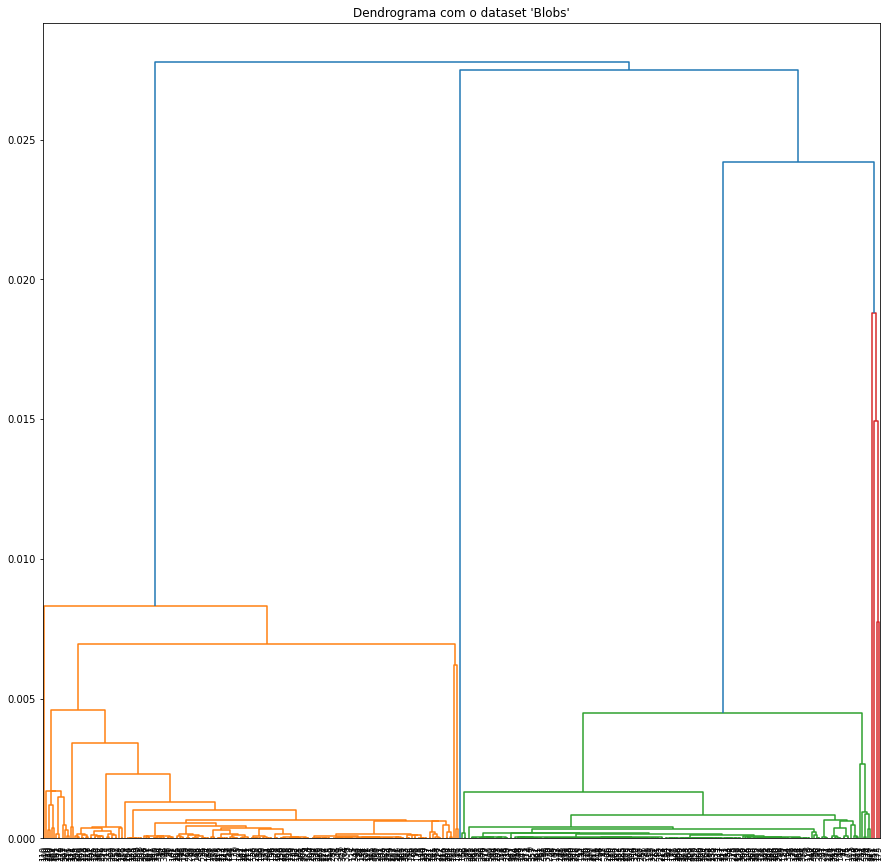

In [143]:
start = process_time()
linkage_result_2_cosine = linkage(elementos, method='single', metric='cosine')
end = process_time()
print("Tempo de processamento com 'single' e distância 'cosine': ",  end-start)
printa_dendograma(linkage_result_2_cosine)


Tempo de processamento com 'average' e distância 'cosine':  0.005086102999996456


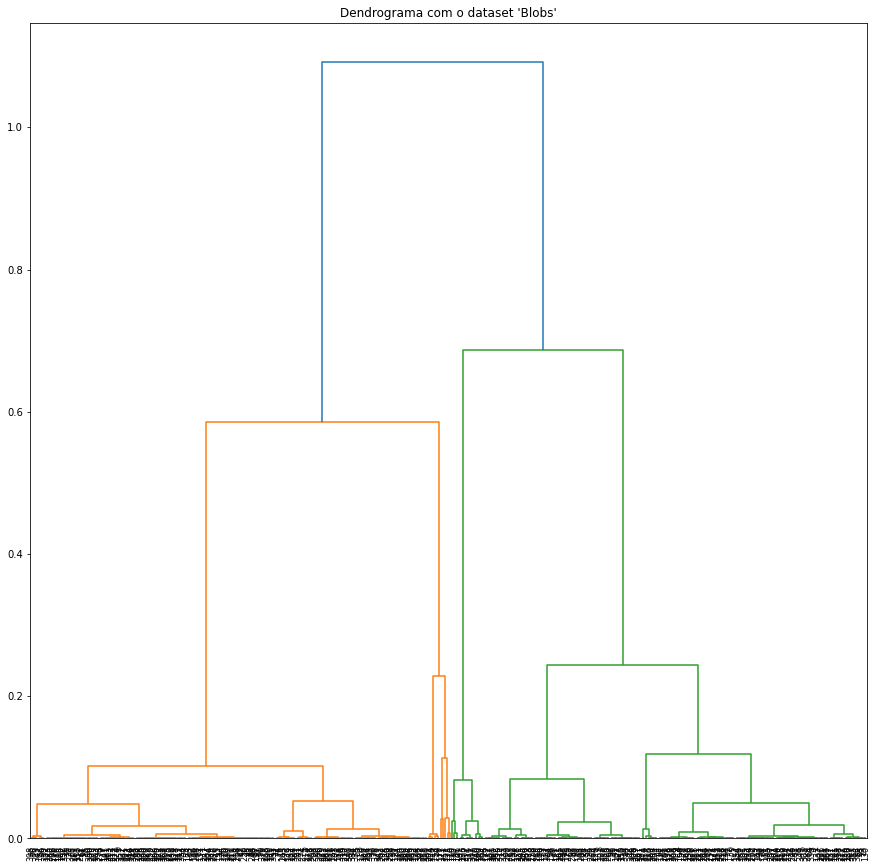

In [144]:
start = process_time()
linkage_result_3_cosine = linkage(elementos, method='average', metric='cosine')
end = process_time()
print("Tempo de processamento com 'average' e distância 'cosine': ",  end-start)
printa_dendograma(linkage_result_3_cosine)


Tempo de processamento com 'complete' e distância 'cosine':  0.00493526899998642


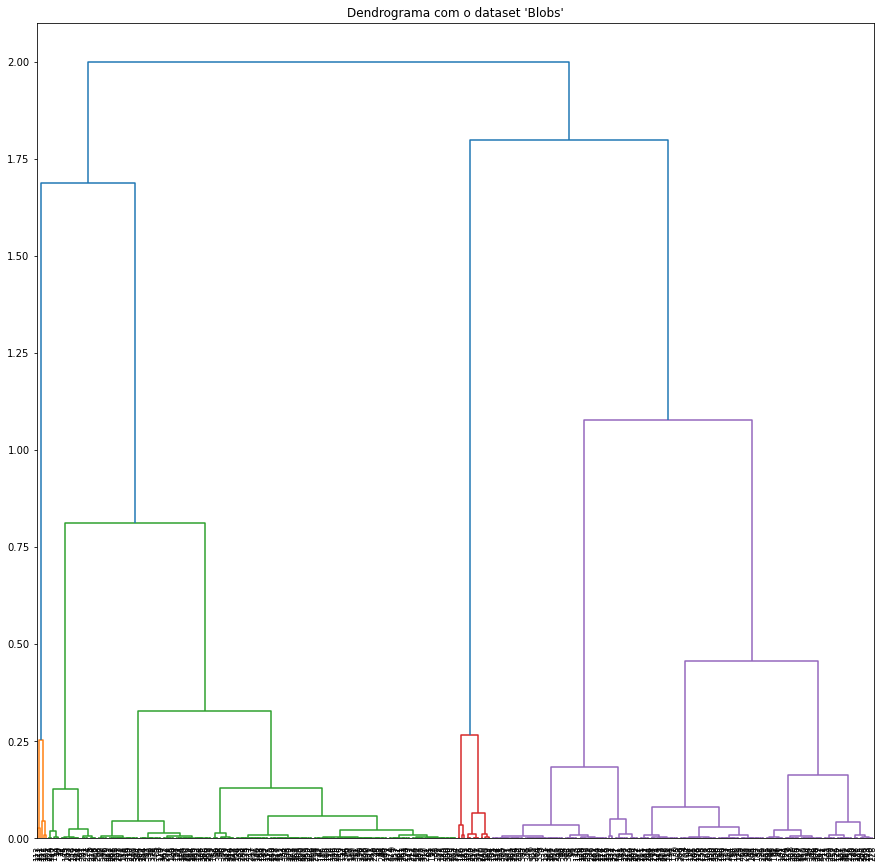

In [145]:
start = process_time()
linkage_result_4_cosine = linkage(elementos, method='complete', metric='cosine')
end = process_time()
print("Tempo de processamento com 'complete' e distância 'cosine': ",  end-start)
printa_dendograma(linkage_result_4_cosine)

---
Os algoritmos estudados acima realizaram o processo de análise e agrupamento sem considerar alguma estrutura previamente existente entre os dados. O objetivo será justamente criar uma estrutura, par-a-par, criando uma árvore que relaciona, conecta todas os elementos entre sí (através dos subgrupos ou níveis), até chegar na raíz (o *cluster* global, com todos os elementos). Clusters isolados não podem existir no agrupamento hierarquico. 

No entanto, como a base do algoritmo é a distância euclidiana, pode ser que alguns elementos estejam próximos nesse espaço euclidiano, mas distantes considerando outra métrica mais apropriada para o conjunto de dados. Ainda, pode ser que alguns elementos tenham alguma estrutura ou relação que você não quer perder, ou melhor, quer considerar ou manter durante o agrupamento (por exemplo, só agrupar elementos que sejam de determinado tipo ou tenham determinado tipo de relação). Isso é chamado de *clustering with constraints* (para detalhes, sugiro a leitura do artigo ["Integrating Constraints and Metric Learning in Semi-Supervised clustering"](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/04-semi-icml.pdf). 

Nesses casos, você terá que especificar como se dá a conectividade entre os elementos do seu conjunto de dados. Para tanto, o método `AgglomerativeClustering` tem um parâmetro denominado de `connectivity`, o qual pode ser usado para você passar informações sobre a conectividade entre os elementos.

Outra possibilidade é usar a função `neighbours_graph`, que analisa os vizinhos mais próximos e cria um grafo indicando essa estrutura de conectividade (vizinhança) entre os elementos. Ela tem vários parâmetros, entre eles a métrica a ser usada no cálculo de distância e a quantidade de vizinhos a ser considerada.

A título de exemplo, abaixo temos a criação de um *dataset* e a aplicação de diferentes algoritmos de agrupamento hierárquico, com e sem o uso de uma estrutura de conectividade.

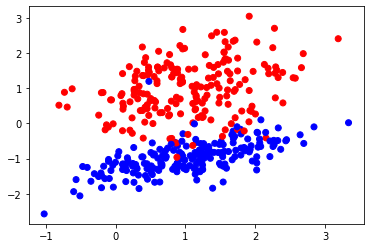

In [146]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# descomente e tente com um dos outros conjuntos de dados das linhas comentadas
elementos, classes = make_classification(n_samples=400, n_features=2, n_clusters_per_class=1, random_state=9, n_informative=2, n_redundant=0)
# elementos, classes = make_classification(n_samples=300, n_features=2, n_clusters_per_class=1, random_state=6, n_informative=2, n_redundant=0)
# elementos, classes = make_classification(n_samples=300, n_features=2, n_clusters_per_class=1, random_state=3, n_informative=2, n_redundant=0)
# elementos, classes = make_classification(n_samples=1500, n_features=2, n_clusters_per_class=2, random_state=10, n_informative=2, n_redundant=0)

plt.scatter(elementos[:,0], y=elementos[:,1], c=classes, cmap=plt.get_cmap('bwr'))
plt.show()

O trecho de código seguinte usa a função `kneighbors_graph` para identificar a conectividade local do conjunto de dados. Quanto maior for a quantidade de vizinhos (por padrão é x), mais homogêneos serão os clusters, mas maior será o tempo de computação. Um número muito grande de vizinhos fornece tamanhos de *cluster* uniformemente melhor distribuídos, mas pode não impor a estrutura de distribuição local dos dados.

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:551: UserWarning: the number of connected components of the connectivity matrix is 62 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity=affinity
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:551: UserWarning: the number of connected components of the connectivity matrix is 62 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity=affinity
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:281: UserWarning: the number of connected components of the connectivity matrix is 62 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity="euclidean"
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:551: UserWarning: the number of connected components of the connectivity matrix is 62 > 1. Completing it to avoid stopping the tree early.
  X, connectivity, affinity=affinity


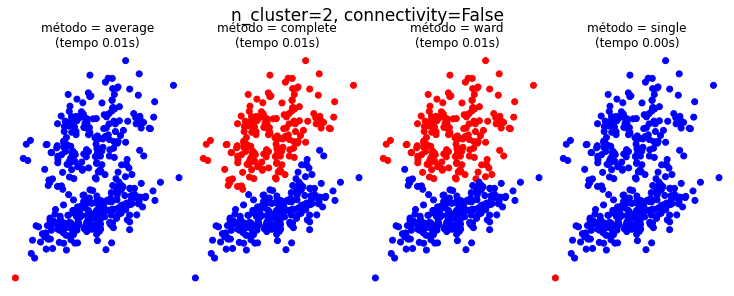

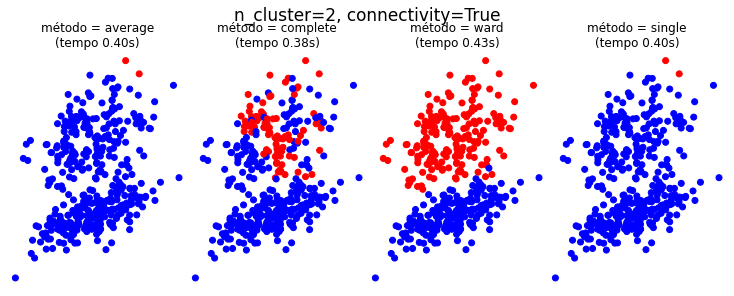

In [147]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import time

n_clusters = 2
n_vizinhos = 2       # tente valores diferentes e veja se há alguma diferença
metric = "cosine" # tente outras métricas (e.g., 'cosine', 'minkowski')
knn_graph = kneighbors_graph(elementos, n_vizinhos, metric=metric, include_self=False)

for connectivity in (None, knn_graph):
  plt.figure(figsize=(10, 4))
  for index, linkage in enumerate(("average", "complete", "ward", "single")):
      plt.subplot(1, 4, index + 1)
      model = AgglomerativeClustering(linkage=linkage, connectivity=connectivity, n_clusters=n_clusters)
      t0 = time.time()
      model.fit(elementos)
      elapsed_time = time.time() - t0
      plt.scatter(elementos[:, 0], elementos[:, 1], c=model.labels_, cmap=plt.get_cmap('bwr'))#cmap=plt.cm.nipy_spectral)
      plt.title("método = %s\n(tempo %.2fs)" % (linkage, elapsed_time), fontdict=dict(verticalalignment="top"),)
      plt.axis("off")

      plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
      plt.suptitle("n_cluster=%i, connectivity=%r" % (n_clusters, connectivity is not None),size=17)

plt.show()

---

**Exercício 2**: o código seguinte recria os *datasets* que usamos na aula anterior (com poucas variações) e acrescenta um quarto: `blobs`. 

Com base neles, aplique o algoritmo de clusterização aglomerativa (hierarquica) pelo método de que você identificou como mais flexível ou mais eficaz no *Exercício 1*. 

Como já sabemos que há `2` clusters, não será necessário gerar dendrogramas e analisar seus resultados. Você pode aplicar diretamente a função `AgglomerativeClustering` em cada *dataset*, com as configurações adequadas para o método escolhido por você. 

Como fizemos na aula anterior, avalie visualmente a capacidade deles em representar a estrutura dos diferentes conjuntos de dados gerados (`moons`, `circles`, `Two classes` e `blobs`). Compare (visualmente) o resultado obtido pelo algoritmo utilizado por você, contrastando com as categorias originais do *dataset* gerado. 

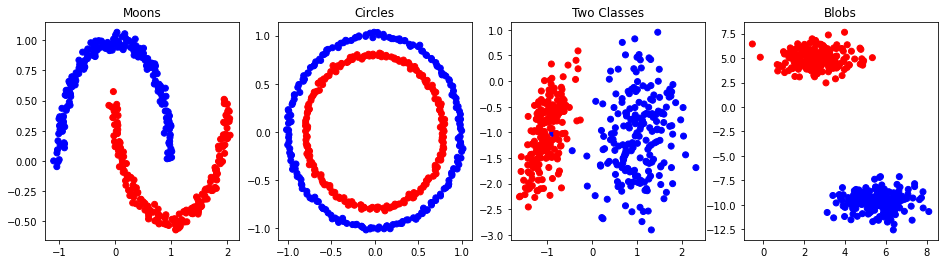

In [148]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from pandas import DataFrame 

random_state = 10 #12  
n_samples = 400

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,4))

elementos1, classes1 = make_moons(n_samples=n_samples, noise=0.04, random_state=random_state)
ax1.scatter(elementos1[:,0], y=elementos1[:,1], label=classes1, c=classes1, cmap=plt.get_cmap('bwr'))
ax1.set_title("Moons")
df_moons = DataFrame(dict(x=elementos1[:,0], y=elementos1[:,1], classe=classes1))

elementos2, classes2 = make_circles(n_samples=n_samples, noise=0.015, random_state=random_state)
ax2.scatter(elementos2[:,0], y=elementos2[:,1], label=classes2, c=classes2,cmap=plt.get_cmap('bwr'))
ax2.set_title("Circles")
df_circles = DataFrame(dict(x=elementos2[:,0], y=elementos2[:,1], classe=classes2))

elementos3, classes3 = make_classification(n_samples=n_samples, n_features=2, n_clusters_per_class=1, random_state=random_state, n_informative=2, n_redundant=0)
ax3.scatter(elementos3[:,0], y=elementos3[:,1], label=classes3, c=classes3, cmap=plt.get_cmap('bwr'))
ax3.set_title("Two Classes")
df_classification = DataFrame(dict(x=elementos3[:,0], y=elementos3[:,1], classe=classes3))

elementos4, classes4 = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)
ax4.scatter(elementos4[:,0], y=elementos4[:,1], label=classes4, c=classes4, cmap=plt.get_cmap('bwr'))
ax4.set_title("Blobs")
df_blobs = DataFrame(dict(x=elementos4[:,0], y=elementos4[:,1], classe=classes4))

fig.show()

In [149]:
def exercicio_2(elementos, classes, n_clusters, n_vizinhos, metric, linkage, knn):
  if knn:
    connectivity = kneighbors_graph(elementos, n_vizinhos, metric=metric, include_self=False)
  else:
    connectivity = None
  

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
  ax1.scatter(elementos[:,0], y=elementos[:,1], label=classes, c=classes, cmap=plt.get_cmap('bwr'))
  ax1.set_title("Original")
  # plt.figure(figsize=(10, 4))
    
  # plt.subplot(1, 4, 1)
  model = AgglomerativeClustering(linkage=linkage, connectivity=connectivity, n_clusters=n_clusters)
  t0 = time.time()
  model.fit(elementos)
  elapsed_time = time.time() - t0
  ax2.scatter(elementos[:, 0], elementos[:, 1], c=model.labels_, cmap=plt.get_cmap('bwr'))#cmap=plt.cm.nipy_spectral)
  # ax2.title("método = %s\n(tempo %.2fs)" % (linkage, elapsed_time), fontdict=dict(verticalalignment="top"),)
  plt.axis("off")

  # plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
  fig.suptitle("n_cluster=%i, connectivity=%r" % (n_clusters, connectivity is not None),size=17)

  # plt.show()
  fig.show()
  return model

AgglomerativeClustering(linkage='single')

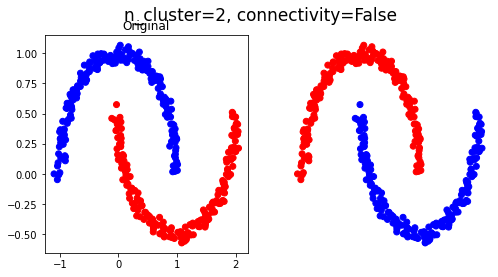

In [150]:
# Moons
exercicio_2(elementos1, classes1, 2, 2, "minkowski", "single", False)

AgglomerativeClustering(linkage='single')

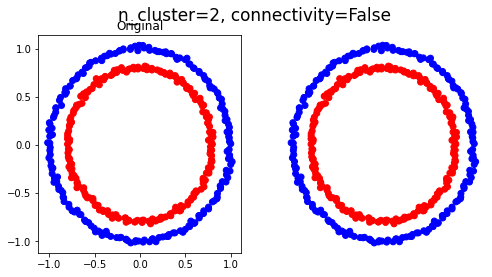

In [151]:
# Circles
exercicio_2(elementos2, classes2, 2, 2, "minkowski", "single", False)

AgglomerativeClustering()

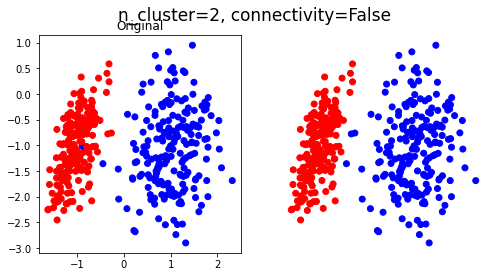

In [152]:
# Two Classes
exercicio_2(elementos3, classes3, 2, 2, "minkowski", "ward", False)

AgglomerativeClustering(linkage='single')

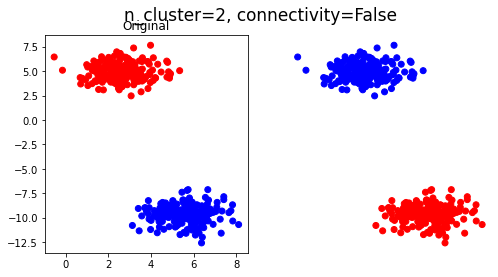

In [153]:
# Blobs
exercicio_2(elementos4, classes4, 2, 2, "minkowski", "single", False)

**Exercício 3**: Crie um *data set* que contenha 3 dimensões (ou carregue o dataset `Iris` que estudamos na última aula e selecione somente 3 de suas dimensões -- as mais representativas, já identificadas anteriormente). 

Aplique o agrupamento hierarquico aglomerativo nele (tanto pelo método de `ward` quanto pelo `single` linkage). Não é necessário gerar um dendrograma, pois sabemos que há `3` classes, mas se desejar gerá-lo só para avaliar como as flores são agrupadas, não há problema.

Finalmente, gere 3 gráficos em 3D: um com as classes originais (os tipos de flores), um com o resultado do agrupamento com `ward` e outro com `single` linkage. 


In [154]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler

# Carrega os dados e os apresenta em forma de tabela (dataset pandas)
data, target = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
data["target"] = target
dados = data.iloc[:, 0:4] # seleciona só as 4 primeiras colunas
dimensoes = dados.values  # dados vistos como arrays (para usar no kmeans)
# data

# Scaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dimensoes)

In [155]:
def exercicio_3(elementos, classes, n_clusters, n_vizinhos, metric, linkage, knn):
  if knn:
    connectivity = kneighbors_graph(elementos, n_vizinhos, metric=metric, include_self=False)
  else:
    connectivity = None
  
  model = AgglomerativeClustering(linkage=linkage, connectivity=connectivity, n_clusters=n_clusters)
  model.fit(elementos)
  
  return model

In [156]:
# Mostra os clusters encontrados em 3D (mas lembre-se que há 4 no total!)
# para mostrar todas, teremos que usar alguma técnica de redução de dimensionalidade 
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(scaled_features, model):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(projection='3d')
  ax.scatter3D(scaled_features[:,0], scaled_features[:,1], scaled_features[:,2],c=model.labels_)

  plt.show()

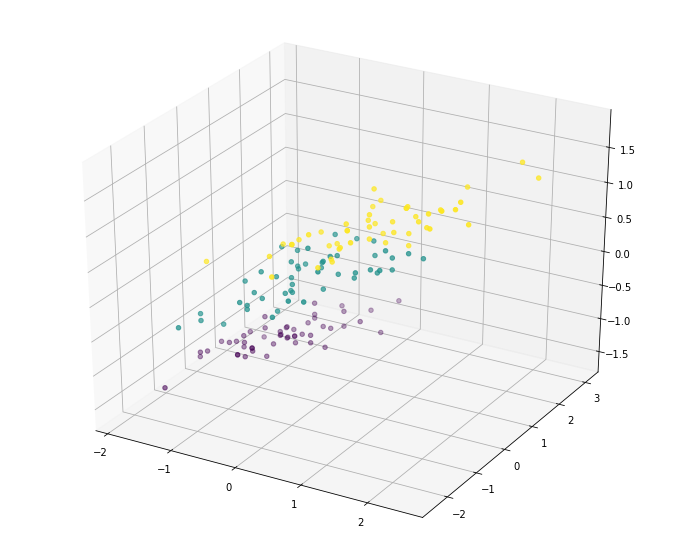

In [157]:
# Classes Originais
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(scaled_features[:,0], scaled_features[:,1], scaled_features[:,2],c=data["target"])

plt.show()

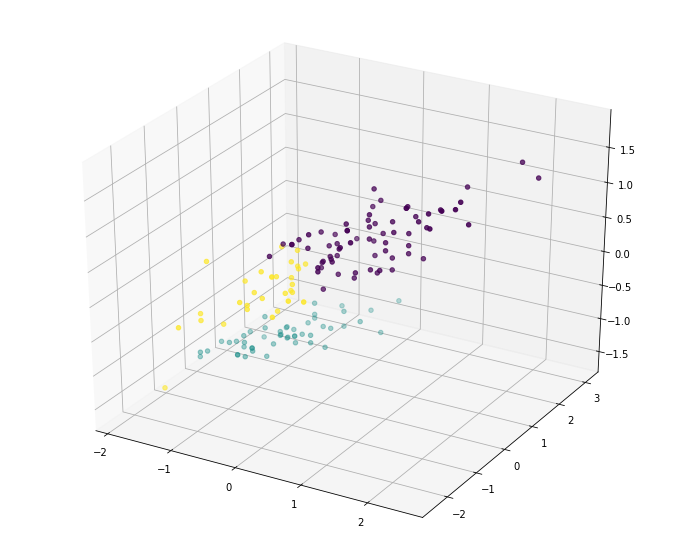

In [158]:
# ward
model_ward = exercicio_3(scaled_features, target, 3, 5, "minkowski", "ward", True)
data['resultado_ward']=model_ward.labels_
# print(data)

plot_3d(scaled_features, model_ward)

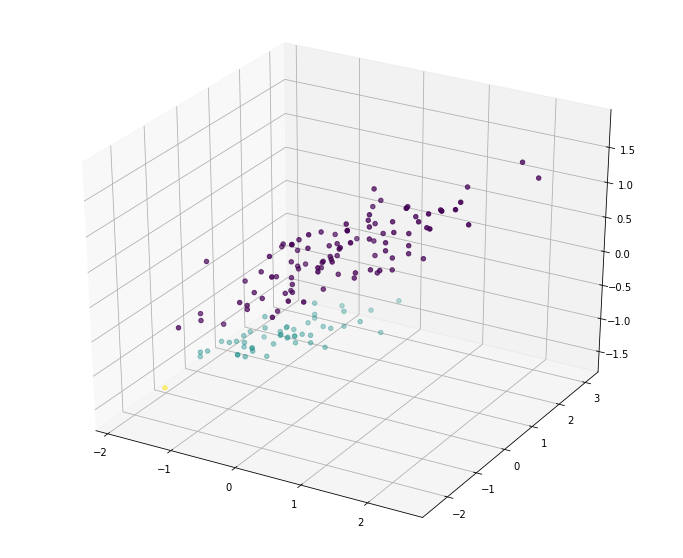

In [159]:
# single
model_single = exercicio_3(scaled_features, target, 3, 5, "minkowski", "single", True)
data['resultado_single']=model_single.labels_
# print(data)

plot_3d(scaled_features, model_single)

In [160]:
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  resultado_ward

---

Vamos agora imaginar um *data set* mais realístico. O trecho de código seguinte carrega um subconjunto de dados do enem de 2014 (o conjunto original é muito grande e para fins didáticos não seria adequado, tanto pelo volume de dados quanto pela complexidade).

In [161]:
import pandas as pd
import requests
import io

uri = 'http://raw.githubusercontent.com/lwives/mlp/master/2014.csv'
content = requests.get(uri).content
df = pd.read_csv(io.StringIO(content.decode('utf-8')), sep=";",usecols=["ano_fim_2g","co_uf_curso", "nu_idade", "tp_sexo", "nt_ger"])

df.head() # mostra só os 5 primeiros registros

,co_uf_curso,nu_idade,tp_sexo,ano_fim_2g,nt_ger
0,51,23,M,2007,66.9
1,51,24,M,2007,52.7
2,51,22,F,2009,58.2
3,51,24,F,2007,62.0
4,51,23,F,2008,71.5


Como mencionado, esse não é o *data set* original. O original pode ser obtido em https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem, caso você tenha interesse.

Tente aplicar alguma das técnicas de agrupamento que estudamos até agora. Você consegue? 

Repare que há dados numéricos contínuos e categóricos, além de dados alfanuméricos. Visto que todos os algoritmos são baseados em alguma medidada de distância ou similaridade, como poderíamos comparar esses registros?